#  Machine learning classificatin

# Image Classification

In [ ]:
# Author @Mohabey
#classifying cat, dog, panda image

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras import applications

# Classifier
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [49]:
categories = ['dog', 'panda', 'cat']
X_train, X_test = [], []
y_train, y_test = [], []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3


# load training data
for k, category in enumerate(categories):
    for f in os.listdir('./data/train/' + category):
        imagePaths.append(['./data/train/' + category+'/'+f, k])

# loop over the input images
for imagePath in tqdm(imagePaths):
    if 'ds_store' in imagePath[0].lower():
        continue
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    X_train.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    y_train.append(label)

# load test data
imagePaths = []
for k, category in enumerate(categories):
    for f in os.listdir('./data/test/' + category):
        imagePaths.append(['./data/test/' + category+'/'+f, k])

# loop over the input images
for imagePath in tqdm(imagePaths):
    if 'ds_store' in imagePath[0].lower():
        continue
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    X_test.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    y_test.append(label)


X_train, X_test, y_train, y_test  = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

100%|████████████████████████████████████████| 153/153 [00:01<00:00, 94.07it/s]


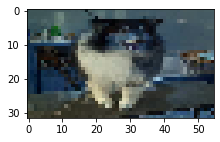

In [50]:
# Show images
plt.figure(figsize=(15,2))
plt.imshow(X_train[6])


In [51]:
# Normalize the data. 
#Images are numbers [0,255]. By dividing by 255 we normalize it into a range of [0,1]
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255


In [52]:
# For a CNN, the input is always a tensor. A Tensor is a 3-D Matrix (height, width, channels). "Channels are the colors". 

#X_train = X_train.reshape(-1, 32, 55, 3)
#X_test = X_test.reshape(-1, 32, 55, 3) 

In [53]:
X_train.shape    #checking the shape of train data

(2879, 32, 55, 3)

In [54]:
y_train.shape     #checking shape of test data

(2879,)

In [55]:
# Define CNN model
# CNN model has following layer convolution, batch, maxpool, conv, dropout, batch,maxpool,conv,max,conv,dropout,batch,maxpool
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:])) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # it randomly removes neurons, to avoid overfitting.
model.add(BatchNormalization()) # BatchNormalization
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))       #since we have 3 output category

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   #using adam optimizer and sparse_categorical_crossentropy as a loss functiom

model.summary()    #Generate summary of the model


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 28, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 14, 64)        

In [63]:
#fitting the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test)) # Running for 10 epochs

Epoch 1/10
90/90 [==============================] - 12s 130ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 1.2203 - val_accuracy: 0.6933
Epoch 2/10
90/90 [==============================] - 11s 127ms/step - loss: 0.0398 - accuracy: 0.9844 - val_loss: 1.1688 - val_accuracy: 0.6800
Epoch 3/10
90/90 [==============================] - 12s 129ms/step - loss: 0.0850 - accuracy: 0.9680 - val_loss: 1.5030 - val_accuracy: 0.7133
Epoch 4/10
90/90 [==============================] - 12s 128ms/step - loss: 0.0300 - accuracy: 0.9882 - val_loss: 1.4561 - val_accuracy: 0.6867
Epoch 5/10
90/90 [==============================] - 12s 128ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 1.7172 - val_accuracy: 0.7267
Epoch 6/10
90/90 [==============================] - 12s 131ms/step - loss: 0.0547 - accuracy: 0.9802 - val_loss: 1.3085 - val_accuracy: 0.7133
Epoch 7/10
90/90 [==============================] - 12s 131ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 1.0632 - val_accuracy: 0.7533

In [64]:
# Evaluate the Neural Network Model
y_pred = model.predict(X_test)


In [65]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report Test Class\n")
target_name = ['dog', 'panda', 'cat']
print(classification_report(y_test, y_pred_classes, target_names = target_name))

Classification Report Test Class

              precision    recall  f1-score   support

         dog       0.57      0.84      0.68        50
       panda       0.78      0.90      0.83        50
         cat       0.78      0.28      0.41        50

    accuracy                           0.67       150
   macro avg       0.71      0.67      0.64       150
weighted avg       0.71      0.67      0.64       150



In [66]:
y_pred_train = model.predict(X_train)
y_pred_classes = [np.argmax(element) for element in y_pred_train]
print("Classification Report Train Class\n")
target_name = ['dog', 'panda', 'cat']
print(classification_report(y_train, y_pred_classes, target_names = target_name))


Classification Report Train Class

              precision    recall  f1-score   support

         dog       0.87      0.99      0.93       954
       panda       0.94      1.00      0.97       956
         cat       1.00      0.80      0.89       969

    accuracy                           0.93      2879
   macro avg       0.93      0.93      0.93      2879
weighted avg       0.93      0.93      0.93      2879



In [67]:
model.evaluate(X_train,y_train)

90/90 [==============================] - 2s 18ms/step - loss: 0.2329 - accuracy: 0.9278


[0.2328823208808899, 0.927752673625946]

In [68]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 15ms/step - loss: 1.9938 - accuracy: 0.6733


[1.993818759918213, 0.6733333468437195]